# Stock price prediction: A machine learning approach

Purpose: Predict stock price using Machine Learning methods, such as Support Vector Machines, Deep Neural Networks and Random Forest \
Authors: Caio Lopes De Souza, Silvio Sandoval Zocchi, Gabriel Rodrigues Palma

# Packages used in the project

In [82]:
# API for acessing the stock data
import yfinance as yfs

# Data manipulation modules
import pandas as pd
import numpy as np

# Data visualisation modules
import matplotlib.pyplot as plt

# Machine Learning modules
from sklearn.ensemble import RandomForestClassifier

# Functions used in the project

In [50]:
def get_stock_series(stock_name):
    '''This function acess the yfinance API and collect the desired stock time series'''
    yfinance_api = yfs.Ticker(stock_name) 
    stock_series = yfinance_api.history(period='max')
    return(stock_series)

def get_train_test_data(stock_series, test_percentage):
    '''This functions creates the training and test data for the stock time series'''
    time_series_length = len(stock_series)
    test_series = stock_series.iloc[:int(time_series_length*test_percentage)]
    train_series = stock_series.iloc[:-int(time_series_length*test_percentage)]
    
    return(test_series, train_series)

# Reading the data

In [54]:
stock_series = get_stock_series(stock_name = 'PETR4.SA')

In [55]:
stock_series.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,2.627552,2.627552,2.627552,2.627552,35389440000,0.0,0.0
2000-01-04,2.482198,2.482198,2.482198,2.482198,28861440000,0.0,0.0
2000-01-05,2.457152,2.457152,2.457152,2.457152,43033600000,0.0,0.0
2000-01-06,2.448654,2.448654,2.448654,2.448654,34055680000,0.0,0.0
2000-01-07,2.459836,2.459836,2.459836,2.459836,20912640000,0.0,0.0


In [84]:
np.array(series_test.shift(-1) > stock_series.Close).astype(int)

array([0, 0, 0, ..., 1, 0, 0])

In [76]:
classes = (series_test.shift(-1) > stock_series.Close)

ValueError: Can only compare identically-labeled Series objects

In [112]:
series_test = stock_series.Close[0:5]
series_test_tommorow = series_test.shift(4)
series_test_tommorow.fillna(series_test_tommorow.iloc[4],inplace=True)

In [113]:
series_test

Date
2000-01-03    2.627552
2000-01-04    2.482198
2000-01-05    2.457152
2000-01-06    2.448654
2000-01-07    2.459836
Name: Close, dtype: float64

In [114]:
series_test_tommorow

Date
2000-01-03    2.627552
2000-01-04    2.627552
2000-01-05    2.627552
2000-01-06    2.627552
2000-01-07    2.627552
Name: Close, dtype: float64

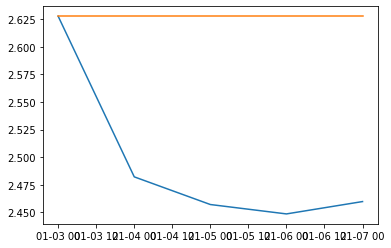

In [115]:
plt.plot(series_test)
plt.plot(series_test_tommorow)

In [105]:
series_test_tommorow > series_test

Date
2000-01-03    False
2000-01-04    False
2000-01-05     True
2000-01-06     True
2000-01-07    False
Name: Close, dtype: bool

## Proposed approach

In [53]:
test_series, train_series = get_train_test_data(stock_series = stock_series,
                                                test_percentage = 0.3)